<a href="https://colab.research.google.com/github/Hikaru-yokoo/EU_M_Math-Repositry/blob/main/chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests, zipfile
from io import StringIO
import io
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


In [3]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [4]:
import pandas as pd
student_data_math = pd.read_csv("student-mat.csv")
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [5]:
#データの読み込み
student_data_math = pd.read_csv("student-mat.csv", sep=";")
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
student_data_math["absences"].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [7]:
#すべてのカラムの情報等をチェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
student_data_math["sex"].head()


0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [9]:
student_data_math["absences"].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [10]:
student_data_math.groupby("sex")["age"].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

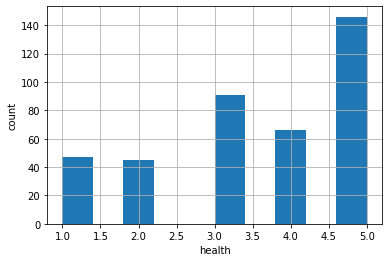

In [11]:
#ヒストグラムデータの指定
import matplotlib.pyplot as plt
plt.hist(student_data_math["health"])

#x軸とy軸のそれぞれのラベル
plt.xlabel("health")
plt.ylabel("count")

plt.grid(True)



In [12]:
#平均値
print("平均値：", student_data_math["health"].mean())
#中央値
print("中央値：", student_data_math["health"].median())
#最頻値
print("最頻値：", student_data_math["health"].mode())

#合計
print("合計：", student_data_math["health"].sum())

平均値： 3.5544303797468353
中央値： 4.0
最頻値： 0    5
dtype: int64
合計： 1404


In [13]:
#分散
print(student_data_math["health"].var(ddof = 0))

#標準偏差
print(student_data_math["health"].std(ddof = 0))
print(np.sqrt(student_data_math["health"].var()))

1.9280499919884664
1.3885423983402403
1.3903033913095781


In [14]:
student_data_math["health"].describe()

count    395.000000
mean       3.554430
std        1.390303
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [15]:
#四方位範囲を求める
student_data_math["health"].describe()[6] - student_data_math["health"].describe()[4]


#for i in range(0,8):
 #   print(student_data_math["health"].describe()[i])
  #  i += 1


2.0

In [16]:
#要約統計量まとめて計算
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


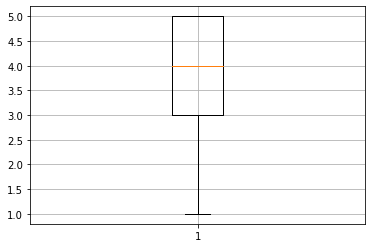

In [17]:
#箱ひげ図
plt.boxplot(student_data_math["health"])
plt.grid(True)

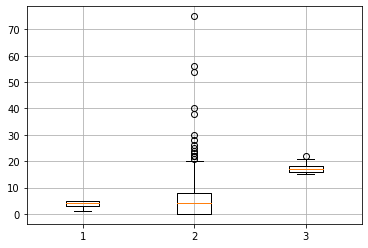

In [18]:
#箱ひげ図3つ
plt.boxplot([student_data_math["health"],student_data_math["absences"],student_data_math["age"]])
plt.grid(True)

In [19]:
#変動係数
student_data_math["absences"].std() / student_data_math["absences"].mean()

1.4018726369879067

In [20]:
student_data_math.std() / student_data_math.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

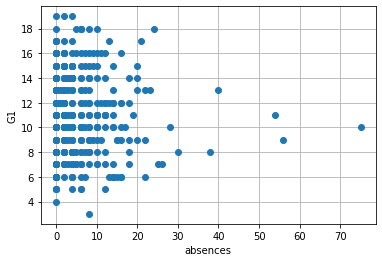

In [21]:
#散布図
plt.plot(student_data_math["absences"], student_data_math["G1"], "o")

#ラベル
plt.xlabel("absences")
plt.ylabel("G1")
plt.grid()


In [22]:
#共分散
np.cov(student_data_math["G1"], student_data_math["G3"])


array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

In [23]:
#分散
print("G1の分散：",student_data_math["G1"].var())
print("G3の分散：",student_data_math["G3"].var())


G1の分散： 11.017053267364899
G3の分散： 20.989616397866737


In [35]:
import scipy as sp
sp.stats.pearsonr(student_data_math["G1"], student_data_math["G3"])

(0.8014679320174141, 9.001430312277354e-90)

In [28]:
#相関行列
np.corrcoef([student_data_math["G1"], student_data_math["G3"]])


array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

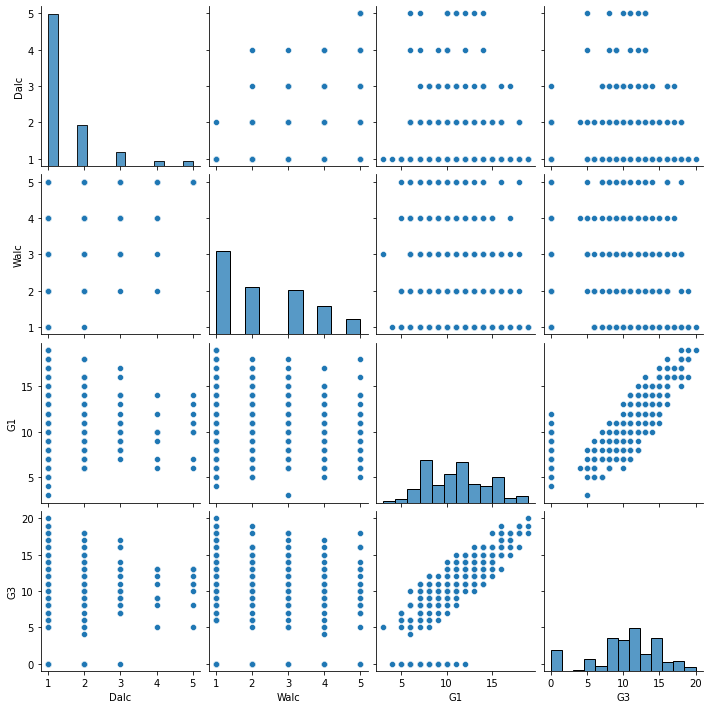

In [29]:
import seaborn as sns
sns.pairplot(student_data_math[["Dalc", "Walc", "G1","G3"]])
plt.grid(True)

In [30]:
#週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby("Walc")["G1"].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

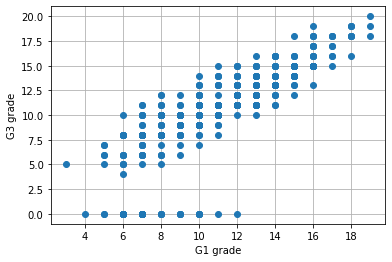

In [31]:
plt.plot(student_data_math["G1"], student_data_math["G3"], "o")
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")
plt.grid()


In [32]:
from sklearn  import linear_model

#線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()


In [33]:
X = student_data_math.loc[:, ["G1"]].values
Y = student_data_math.loc[:, ["G3"]].values

reg.fit(X, Y)

print("回帰係数：",reg.coef_)

print("切片：",reg.intercept_)

回帰係数： [[1.10625609]]
切片： [-1.65280383]


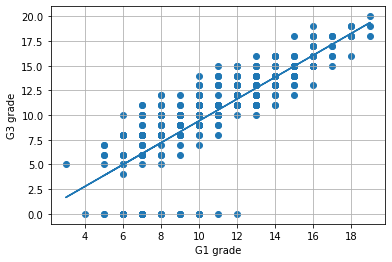

In [34]:
#先ほどと同じ散布図
plt.scatter(X, Y)
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")

plt.plot(X, reg.predict(X))
plt.grid(True)


In [36]:
#決定係数、寄与率とも呼ばれる
print("決定係数：", reg.score(X, Y))


決定係数： 0.6423508460522701
